<a href="https://colab.research.google.com/github/MattJCR/Analisis_coches_net/blob/master/An%C3%A1lisis_coches_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalación en Importacion de datos
Vamos a intentar a prededecir el precio de un coche. Usaremos los datos que hemos recopilado en *coches.net*.


Las importaciones de las librerías que se van a utilizar.

In [ ]:
from IPython.display import clear_output
!pip install wget

import pandas as pd
import numpy as np

# upload files
from google.colab import files
import io

# formatos csv, json
import csv
import json

import wget

url = 'https://github.com/MattJCR/Analisis_coches_net/archive/refs/heads/master.zip'
archivo_zip = 'Analisis_coches_net-master.zip'
wget.download(url, archivo_zip)
!unzip Analisis_coches_net-master.zip
clear_output()

In [ ]:
#funciones para la obtención de columnas con valores nulos
def columns_without_values(data):
    columns = data.isnull().sum()
    print(columns[columns > 0])

#funciones para obtener la representación de los diagramas de cajas
def draw_hist_boxplot(df, feature_name):
    sns.boxplot(x=feature_name, data=df)
    sns.stripplot(x=feature_name, data=df, color="#474646")

#funciones que se utilizan para 'corregir' valores atípicos
def replace_outliers_with_median(df, feature_name):
    Q1 = df[feature_name].quantile(0.25)
    median = df[feature_name].quantile(0.5)
    Q3 = df[feature_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    df[feature_name] = np.where((df[feature_name] < lower_whisker) | 
                                (df[feature_name] > upper_whisker), 
                                 median, 
                                 df[feature_name])

# 1. Importación de datos

In [ ]:
import os
import pandas as pd

csv_files = [f for f in os.listdir('Analisis_coches_net-master/Resultado Scrapy') if f.endswith('.csv')]

df_csv = pd.concat([pd.read_csv(os.path.join('Analisis_coches_net-master/Resultado Scrapy', f)) for f in csv_files])
cols_to_select = ['color', 'fueltype', 'km', 'make', 'model', 'price', 'province', 'transmissiontype', 'year', 'seller_type', 'bodytype', 'cubiccapacity', 'doors', 'hp']

df_csv = df_csv.rename(columns=lambda x: x.lower())
df_csv = df_csv.set_index('id')
df_csv = df_csv[cols_to_select]

In [ ]:
import os
import pandas as pd
import json

# Obtener la lista de archivos JSON
json_files = [f for f in os.listdir('Analisis_coches_net-master/Resultado Scrapy') if f.endswith('.json')]

# Crear un DataFrame vacío para concatenar los resultados
df_json = []

# Leer cada archivo JSON y concatenar el resultado
for f in json_files:
    with open(os.path.join('Analisis_coches_net-master/Resultado Scrapy', f), 'r') as file:
        data = json.load(file)
        if 'resto_de_datos' in data:
            df_temp = pd.json_normalize(data['resto_de_datos'], max_level=1)
            df_temp = df_temp.rename(columns=lambda x: x.split('.')[-1])
            df = pd.json_normalize(data)
            df = pd.concat([df, df_temp], axis=1)
        else:
            df = pd.json_normalize(data)
            # Buscamos si alguna columna contiene el texto 'resto_de_datos'
            if 'resto_de_datos.color' in list(df.columns):
                df = df.rename(columns=lambda x: x.split('.')[-1])
        df = df.rename(columns=lambda x: x.lower())
        df = df.drop_duplicates()
        df = df.set_index('id')
        # print(f,'b:', df.values[0])
        cols_to_select = ['color', 'fueltype', 'km', 'make', 'model', 'price', 'province', 'transmissiontype', 'year', 'seller_type', 'bodytype', 'cubiccapacity', 'doors', 'hp']
        df = df[cols_to_select]
        df_json.append(df)

df_json = pd.concat(df_json)


In [ ]:
df_csv

,color,fueltype,km,make,model,price,province,transmissiontype,year,seller_type,bodytype,cubiccapacity,doors,hp
id,,,,,,,,,,,,,,
54737521,BLUE,Diésel,34798.0,AUDI,A3,22500.0,Almería,AUTOMATIC,2017.0,profesional,Berlina,1598.0,5.0,116.0
54641610,RED,Gasolina,178000.0,AUDI,A1,8990.0,Alicante,MANUAL,2014.0,particular,Berlina,1197.0,3.0,86.0
54229249,GRAY,Gasolina,93000.0,AUDI,Q2,24650.0,Alicante,MANUAL,2019.0,profesional,4x4 SUV,999.0,5.0,116.0
54534381,GRAY,Diésel,133000.0,AUDI,A4,21500.0,Asturias,MANUAL,2016.0,particular,Familiar,1968.0,5.0,190.0
54819626,WHITE,Diésel,65000.0,AUDI,Q3,23700.0,Alicante,MANUAL,2017.0,particular,4x4 SUV,1968.0,5.0,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54741384.0,COMMON.COLOR_RED,Diésel,69000.0,MAZDA,CX5,24999.0,Madrid,COMMON.TRANSMISSION_AUTOMATIC,2019.0,profesional,NaN,2191.0,5.0,150.0
54741045.0,COMMON.COLOR_WHITE,Gasolina,63912.0,MAZDA,MX5,19400.0,Madrid,COMMON.TRANSMISSION_MANUAL,2016.0,profesional,NaN,1998.0,2.0,160.0
54742715.0,COMMON.COLOR_BLUE,Gasolina,47000.0,MAZDA,Mazda2,10500.0,Barcelona,COMMON.TRANSMISSION_MANUAL,2015.0,particular,NaN,NaN,5.0,NaN


In [ ]:
df_json

,color,fueltype,km,make,model,price,province,transmissiontype,year,seller_type,bodytype,cubiccapacity,doors,hp
id,,,,,,,,,,,,,,
54833788,COMMON.COLOR_GRAY,Diésel,157770,MINI,MINI,16500,Badajoz,COMMON.TRANSMISSION_MANUAL,2018,particular,BODY_TYPE_SEDAN,1496.0,5,116.0
54698761,COMMON.COLOR_GREEN,Diésel,125500,MINI,MINI,8950,Madrid,COMMON.TRANSMISSION_MANUAL,2012,particular,BODY_TYPE_SEDAN,1598.0,3,90.0
54735406,COMMON.COLOR_GRAY,Gasolina,32000,MINI,MINI,30900,Granada,COMMON.TRANSMISSION_AUTOMATIC,2019,profesional,BODY_TYPE_SEDAN,1998.0,3,231.0
54454879,COMMON.COLOR_BLACK,Eléctrico,20581,MINI,MINI,31900,Madrid,COMMON.TRANSMISSION_AUTOMATIC,2021,profesional,BODY_TYPE_SEDAN,NaN,3,184.0
53598148,COMMON.COLOR_RED,Gasolina,29780,MINI,MINI,23900,Asturias,COMMON.TRANSMISSION_MANUAL,2020,profesional,BODY_TYPE_SEDAN,1499.0,5,136.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53120422,COMMON.COLOR_GRAY,Di\u00E9sel,74043,VOLVO,XC40,32500,Badajoz,COMMON.TRANSMISSION_MANUAL,2018,profesional,BODY_TYPE_4X4,1969,5,150
54904400,COMMON.COLOR_GRAY,Di\u00E9sel,79000,VOLVO,XC40,28990,Murcia,COMMON.TRANSMISSION_AUTOMATIC,2018,profesional,BODY_TYPE_4X4,1969,5,150
53502162,COMMON.COLOR_BLACK,Di\u00E9sel,166130,VOLVO,XC60,22900,Badajoz,COMMON.TRANSMISSION_AUTOMATIC,2017,profesional,BODY_TYPE_4X4,1969,5,150


In [ ]:
df = pd.concat([df_csv, df_json])
df

,color,fueltype,km,make,model,price,province,transmissiontype,year,seller_type,bodytype,cubiccapacity,doors,hp
id,,,,,,,,,,,,,,
54737521,BLUE,Diésel,34798.0,AUDI,A3,22500.0,Almería,AUTOMATIC,2017.0,profesional,Berlina,1598.0,5.0,116.0
54641610,RED,Gasolina,178000.0,AUDI,A1,8990.0,Alicante,MANUAL,2014.0,particular,Berlina,1197.0,3.0,86.0
54229249,GRAY,Gasolina,93000.0,AUDI,Q2,24650.0,Alicante,MANUAL,2019.0,profesional,4x4 SUV,999.0,5.0,116.0
54534381,GRAY,Diésel,133000.0,AUDI,A4,21500.0,Asturias,MANUAL,2016.0,particular,Familiar,1968.0,5.0,190.0
54819626,WHITE,Diésel,65000.0,AUDI,Q3,23700.0,Alicante,MANUAL,2017.0,particular,4x4 SUV,1968.0,5.0,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53120422,COMMON.COLOR_GRAY,Di\u00E9sel,74043,VOLVO,XC40,32500,Badajoz,COMMON.TRANSMISSION_MANUAL,2018,profesional,BODY_TYPE_4X4,1969,5,150
54904400,COMMON.COLOR_GRAY,Di\u00E9sel,79000,VOLVO,XC40,28990,Murcia,COMMON.TRANSMISSION_AUTOMATIC,2018,profesional,BODY_TYPE_4X4,1969,5,150
53502162,COMMON.COLOR_BLACK,Di\u00E9sel,166130,VOLVO,XC60,22900,Badajoz,COMMON.TRANSMISSION_AUTOMATIC,2017,profesional,BODY_TYPE_4X4,1969,5,150


Obtener información acerca de los datos que se acaban de leer.

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.head()

,color,fueltype,km,make,model,price,province,transmissiontype,year,seller_type,bodytype,cubiccapacity,doors,hp
id,,,,,,,,,,,,,,
54737521,BLUE,Diésel,34798.0,AUDI,A3,22500.0,Almería,AUTOMATIC,2017.0,profesional,Berlina,1598.0,5.0,116.0
54641610,RED,Gasolina,178000.0,AUDI,A1,8990.0,Alicante,MANUAL,2014.0,particular,Berlina,1197.0,3.0,86.0
54229249,GRAY,Gasolina,93000.0,AUDI,Q2,24650.0,Alicante,MANUAL,2019.0,profesional,4x4 SUV,999.0,5.0,116.0
54534381,GRAY,Diésel,133000.0,AUDI,A4,21500.0,Asturias,MANUAL,2016.0,particular,Familiar,1968.0,5.0,190.0
54819626,WHITE,Diésel,65000.0,AUDI,Q3,23700.0,Alicante,MANUAL,2017.0,particular,4x4 SUV,1968.0,5.0,150.0


In [ ]:
df.dtypes

color               object
fueltype            object
km                  object
make                object
model               object
price               object
province            object
transmissiontype    object
year                object
seller_type         object
bodytype            object
cubiccapacity       object
doors               object
hp                  object
dtype: object

In [ ]:
df.describe()

,color,fueltype,km,make,model,price,province,transmissiontype,year,seller_type,bodytype,cubiccapacity,doors,hp
count,14267,14269,14269.0,14269,14269,14269.0,14269,14266,14269.0,14269,12069,13800.0,14258.0,14028.0
unique,23,11,7332.0,38,480,2187.0,61,4,22.0,2,12,196.0,8.0,308.0
top,COMMON.COLOR_WHITE,Diésel,99000.0,VOLKSWAGEN,Golf,18900.0,Madrid,COMMON.TRANSMISSION_MANUAL,2018.0,profesional,BODY_TYPE_SEDAN,1499.0,5.0,150.0
freq,4333,6950,85.0,1230,330,144.0,3552,7949,2602.0,13445,4991,1129.0,11476.0,1913.0


También existe la posibilidad de que el dataset tenga filas duplicadas, que hay que eliminar:

**data.drop_duplicates(subset=None, inplace=True)**

**data.drop_duplicates(subset=['id'], keep='first')**

In [ ]:
df = df.drop_duplicates(keep='first')
df

,color,fueltype,km,make,model,price,province,transmissiontype,year,seller_type,bodytype,cubiccapacity,doors,hp
id,,,,,,,,,,,,,,
54737521,BLUE,Diésel,34798.0,AUDI,A3,22500.0,Almería,AUTOMATIC,2017.0,profesional,Berlina,1598.0,5.0,116.0
54641610,RED,Gasolina,178000.0,AUDI,A1,8990.0,Alicante,MANUAL,2014.0,particular,Berlina,1197.0,3.0,86.0
54229249,GRAY,Gasolina,93000.0,AUDI,Q2,24650.0,Alicante,MANUAL,2019.0,profesional,4x4 SUV,999.0,5.0,116.0
54534381,GRAY,Diésel,133000.0,AUDI,A4,21500.0,Asturias,MANUAL,2016.0,particular,Familiar,1968.0,5.0,190.0
54819626,WHITE,Diésel,65000.0,AUDI,Q3,23700.0,Alicante,MANUAL,2017.0,particular,4x4 SUV,1968.0,5.0,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53120422,COMMON.COLOR_GRAY,Di\u00E9sel,74043,VOLVO,XC40,32500,Badajoz,COMMON.TRANSMISSION_MANUAL,2018,profesional,BODY_TYPE_4X4,1969,5,150
54904400,COMMON.COLOR_GRAY,Di\u00E9sel,79000,VOLVO,XC40,28990,Murcia,COMMON.TRANSMISSION_AUTOMATIC,2018,profesional,BODY_TYPE_4X4,1969,5,150
53502162,COMMON.COLOR_BLACK,Di\u00E9sel,166130,VOLVO,XC60,22900,Badajoz,COMMON.TRANSMISSION_AUTOMATIC,2017,profesional,BODY_TYPE_4X4,1969,5,150


# 2. Preparación de los datos

Una vez leido el dataset transformar los datos a un formato 'válido'.

Analizar los valores nulos y sustituirlos por otros valores.

In [ ]:
#información detallada por cada una de las columnas indicando si tiene o no valores nulos
pd.isnull(df).any()

color               True
fueltype            True
km                  True
make                True
model               True
price               True
province            True
transmissiontype    True
year                True
seller_type         True
bodytype            True
cubiccapacity       True
doors               True
hp                  True
dtype: bool

In [ ]:
#información de aquellas columnas que tienen valores nulos, indicando el número de veces que el valor es nulo
columns_without_values(df)

color                  3
fueltype               1
km                     1
make                   1
model                  1
price                  1
province               1
transmissiontype       4
year                   1
seller_type            1
bodytype            2134
cubiccapacity        437
doors                 11
hp                   230
dtype: int64


En el caso de las columnas numéricas, lo que se puede hacer es sustituir los valores nulos por la media de los valores de la columna.

En el caso de las columnas de texto, lo que se puede hacer es sustituir los valores nulos por el último valor leído de la propia columna.

En el caso de las columnas categóricas (las que toman sólo un pequeño conjunto de valores), lo que se puede hacer es sustituir los valores nulos por el valor que más veces aparece en la propia columna.

También se puede utilizar la interpolación para sustituir los valores nulos: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html#pandas.DataFrame.interpolate

En general, se trata de sustituir los valores nulos por otros valores.

Si es la propia columna objetivo la que presenta valores nulos, lo que se debe hacer es eliminar esas filas.

También es necesario comprobar que todos los datos tienen valores correctos: desde 2012 a 2022, desde 10.000 km a 180.000 km, etc.

In [ ]:
df.dropna(subset=['model'], inplace=True)

<ipython-input-15-f49b3d3161c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['model'], inplace=True)


In [ ]:
# Reemplazamos los valores nulos con la moda
df.fillna(df.mode().iloc[0], inplace=True)


<ipython-input-16-da0b3d5f1d15>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.mode().iloc[0], inplace=True)
<ipython-input-16-da0b3d5f1d15>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.mode().iloc[0], inplace=True)
<ipython-input-16-da0b3d5f1d15>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [ ]:
#información detallada por cada una de las columnas indicando si tiene o no valores nulos
pd.isnull(df).any()

color               False
fueltype            False
km                  False
make                False
model               False
price               False
province            False
transmissiontype    False
year                False
seller_type         False
bodytype            False
cubiccapacity       False
doors               False
hp                  False
dtype: bool

# 3. Normalización de los datos

In [ ]:
# Convertir columnas numéricas a float
for col in df.columns:
    if isinstance(df[col][0], (int, float)):
        df[col] = df[col].astype(float)

<ipython-input-18-864bcfac35a2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(float)


In [ ]:
df.dtypes

color                object
fueltype             object
km                  float64
make                 object
model                object
price               float64
province             object
transmissiontype     object
year                float64
seller_type          object
bodytype             object
cubiccapacity       float64
doors               float64
hp                  float64
dtype: object

Definimos listas en las que se guardan los nombre de los campos numéricos y los de los campos categóricos. No se incluye el nombre del campo objetivo.

In [ ]:
campos_numericos = []

campos_categoricos = []
for columna in df.columns:
    if df[columna].dtype == 'int64' or df[columna].dtype == 'float64':
        campos_numericos.append(columna)
    else:
        campos_categoricos.append(columna)
print('campos_numericos',campos_numericos)
campos_numericos.remove('price')
all_feature_names = campos_numericos + campos_categoricos

target = 'price' # o como se llame
all_feature_names

campos_numericos ['km', 'price', 'year', 'cubiccapacity', 'doors', 'hp']


['km',
 'year',
 'cubiccapacity',
 'doors',
 'hp',
 'color',
 'fueltype',
 'make',
 'model',
 'province',
 'transmissiontype',
 'seller_type',
 'bodytype']

Se visualizan los histogramas de las columnas numéricas.

<ipython-input-21-f406af986e5c>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[campos_numericos].hist(ax=plt.figure(figsize=(15,15)).gca())


array([[<Axes: title={'center': 'km'}>, <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'cubiccapacity'}>,
        <Axes: title={'center': 'doors'}>],
       [<Axes: title={'center': 'hp'}>, <Axes: >]], dtype=object)

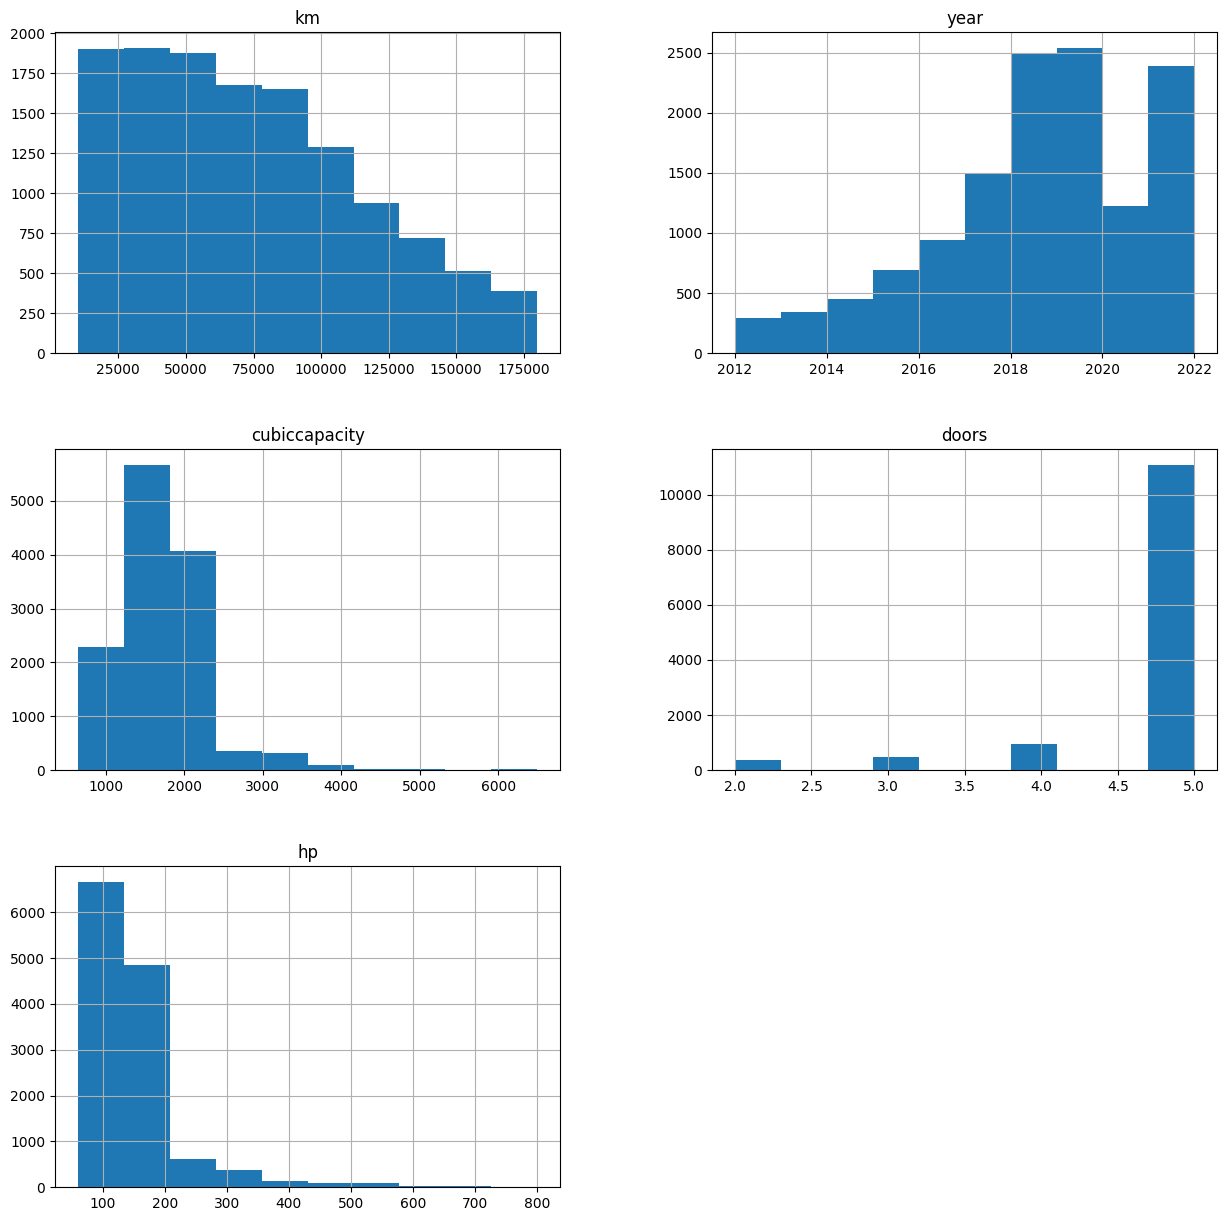

In [ ]:
import matplotlib.pyplot as plt
#histogramas de las columnas numéricas
df[campos_numericos].hist(ax=plt.figure(figsize=(15,15)).gca())

#al ejecutar estos histogramas por primera vez, lo que se puede observar es que en realidad muchas
#de estas variables numéricas en realidad son categóricas

Se visualizan los diagramas de cajas. En el caso en el que muchos valores se salgan del diagrama, se puede intentar hacer una normalización de los datos que acerque todos los outliers al conjunto de datos.

También existe la posibilidad de eliminar directamente aquellos datos que se consideren erróneos.

La normalización se supone que hace que mejore el comportamiento del algoritmo de creación del modelo, se puede comprobar si realmente se obtienen mejores resultados, comparando ambos modelos.

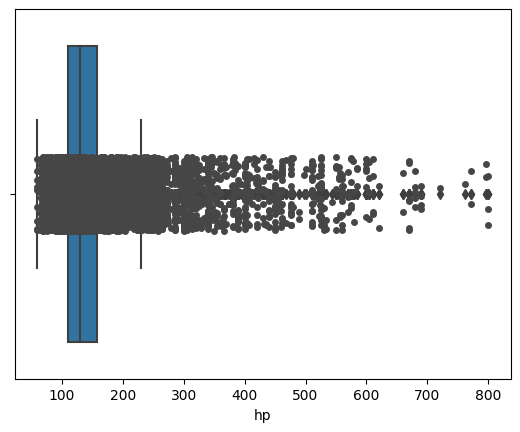

In [ ]:
import seaborn as sns
#visualizar los diagramas para todas las propiedades numéricas
draw_hist_boxplot(df, 'hp')

In [ ]:
# replace_outliers_with_median(df, 'hp')
# draw_hist_boxplot(df, 'hp')

In [ ]:
#se puede calcular la desviación de la distribución, si el valor es negativo la desviación es a la izquierda y si es positivo es a la derecha
print(df['km'].skew())

0.5131620039590125


Una vez corregidos los valores nulos y corregidos los outliers, se puede analizar la relación de los atributos con el objetivo.

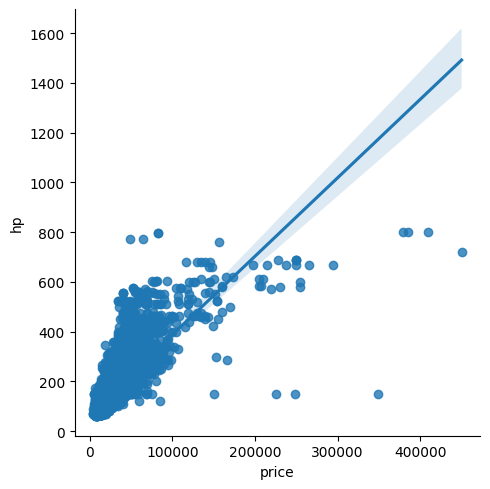

In [ ]:
sns.lmplot(data=df, x='price', y='hp', order=1)
#sns.lmplot(data=data, x="hp", y="price", order=1)

Una vez 'normalizados' todos los valores y habiendo acercado los outliers al conjunto de datos, se puede realizar una segunda normalización en la que se intenta transformas los valores de cada columna de tal manera que la media sea 0 y la desviación típica 1. Esto se puede hacer mediante el escalado de los valores numéricos.

<ipython-input-26-84fd94c2c0b6>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[campos_numericos].hist(ax=plt.figure(figsize=(15,15)).gca())


array([[<Axes: title={'center': 'km'}>, <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'cubiccapacity'}>,
        <Axes: title={'center': 'doors'}>],
       [<Axes: title={'center': 'hp'}>, <Axes: >]], dtype=object)

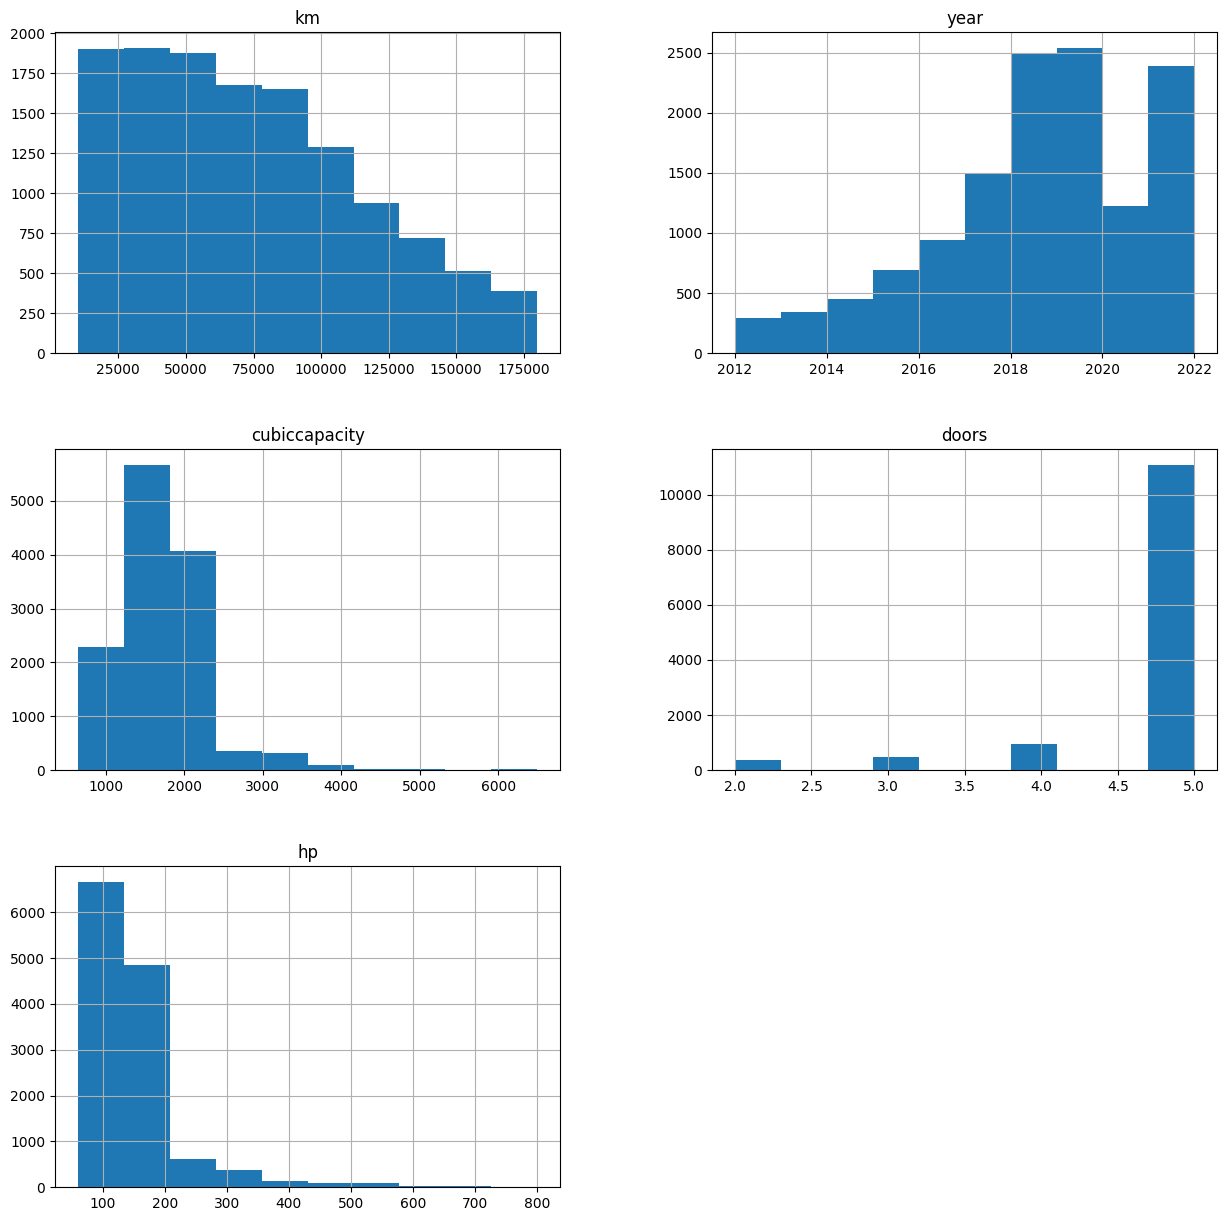

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# df[campos_numericos] = scaler.fit_transform(df[campos_numericos])
df[campos_numericos].hist(ax=plt.figure(figsize=(15,15)).gca())

También existen otros métodos de normalización.

In [ ]:
'''
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[campos_numericos] = scaler.fit_transform(df[campos_numericos])
'''

'\nfrom sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler()\ndf[campos_numericos] = scaler.fit_transform(df[campos_numericos])\n'

Para que el algoritmo de generación del modelo funcione es necesario eliminar los valores nulos.

La búsqueda y la corrección de los outliers es convienete realizarla para evitar que datos posiblemente erróneos alteren el modelo que se genera.

En cuanto al escalado es posible que escalando los datos se mejoren los resultados que se obtienen, aunque también es conveniente comparar los resultados que se obtienen, por si el escalado produce resultados peores.

# 4. Importancia de los datos y división del conjunto de datos

Para estudiar la relación que existe entre todas las variables se puede generar un 'mapa de calor'. Si se observa que alguna variable realmente no tiene ninguna influencia sobre la variable objetivo, se puede eliminar esa propiedad.

<ipython-input-28-5879926ea6b1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='BrBG', annot=True)


<Axes: >

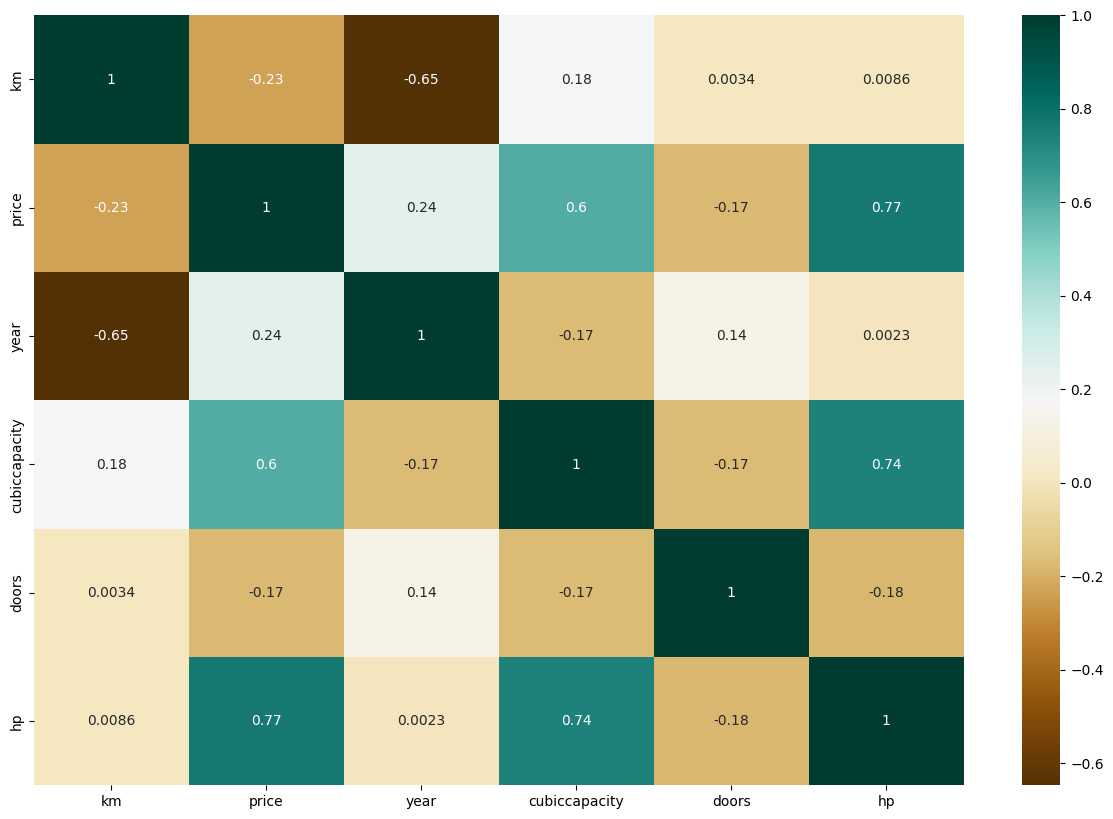

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='BrBG', annot=True)

Para eliminar una variable del dataset se puede utilizar el método drop(). El atributo id seguro que no aporta nada y se puede eliminar. Pero también ha resultado util mantenerlo hasta este momento para poder eliminar filas duplicadas.

In [ ]:
# df.drop(['id'], axis=1, inplace=True)

También se puede dibujar los diagramas de cajas para ver la relación de la variable objetivo con las variables categóricas.

<Axes: xlabel='transmissiontype', ylabel='price'>

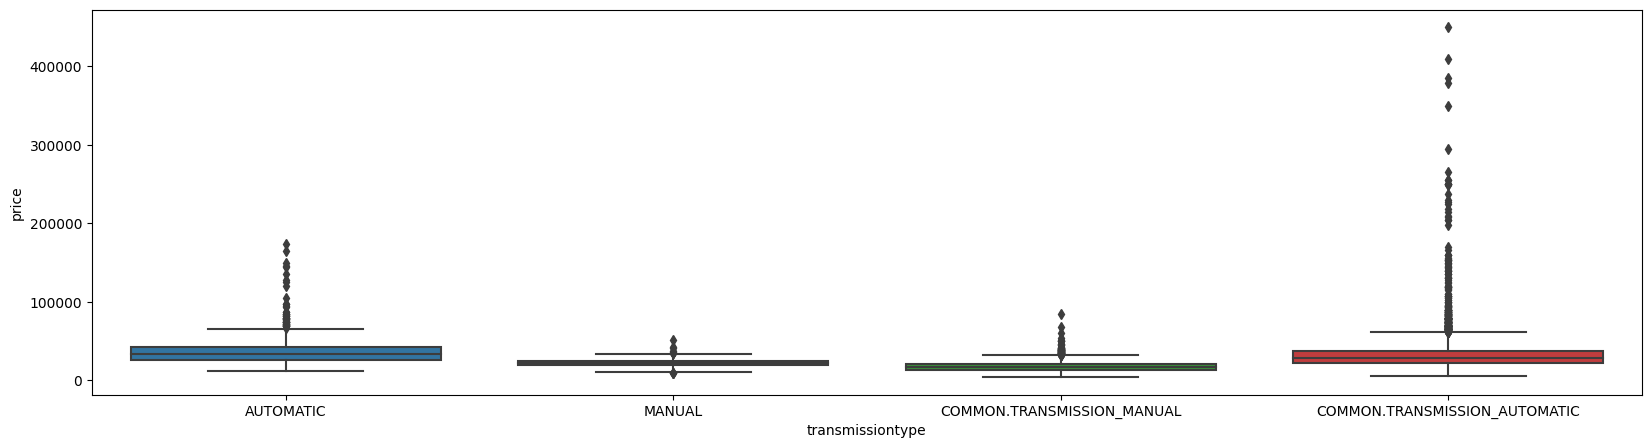

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(x='transmissiontype', y='price', data=df) # etc.

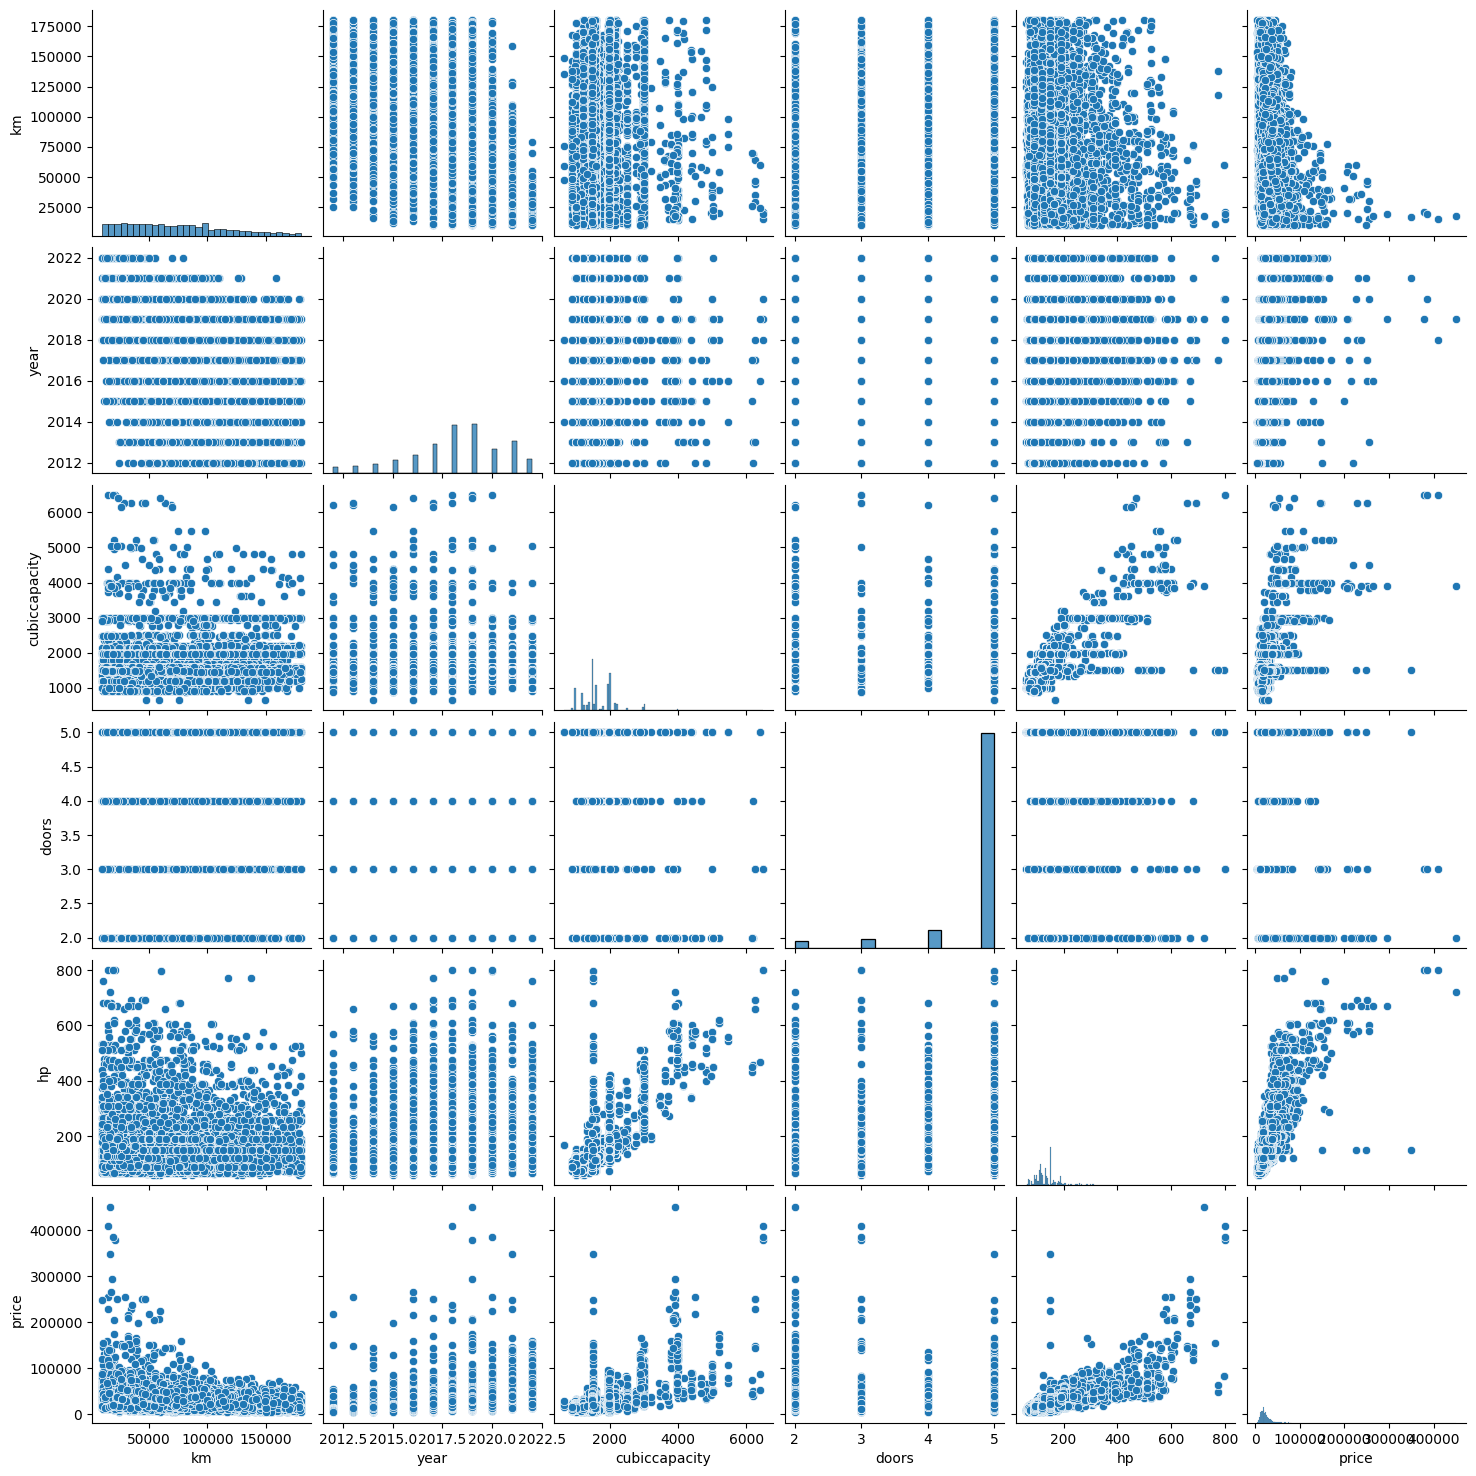

In [ ]:
sns.pairplot(df[campos_numericos + [target]])

Una vez vistas las relaciones de las variables categóricas con la variable objetivo, se puede decidir eliminar aquellas variables categóricas que no tengan prácticamente ninguna influencia sobre la variable objetivo.

In [ ]:
#used_features = all_feature_names.append(target)
used_features = all_feature_names + [target]

In [ ]:
used_features

['km',
 'year',
 'cubiccapacity',
 'doors',
 'hp',
 'color',
 'fueltype',
 'make',
 'model',
 'province',
 'transmissiontype',
 'seller_type',
 'bodytype',
 'price']

Para crear las conjuntos de datos de entrenamiento y de prueba se ha de dividir el dataset. Primero se obtiene los conjuntos de entranamiento y de prueba. El conjunto de entrenamiento a su vez se divide en el conjunto que se utiliza para realizar el entrenamiento y el que se utiliza para realizar la validación.

In [ ]:
#@title Separar datos entre datos de entrada y etiquetas (resultados)

# Obtenemos la columna price
df_price= df['price']

# Eliminamos la columna price del dataframe
df = df.drop('price',axis=1)

In [ ]:
df_price[:10]

id
54737521    22500.0
54641610     8990.0
54229249    24650.0
54534381    21500.0
54819626    23700.0
54819635    11500.0
54819633    17500.0
54640116    25790.0
54741464    22900.0
54817318    29499.0
Name: price, dtype: float64

In [ ]:
print(df[:10])

           color  fueltype        km  make model    province transmissiontype  \
id                                                                              
54737521    BLUE    Diésel   34798.0  AUDI    A3     Almería        AUTOMATIC   
54641610     RED  Gasolina  178000.0  AUDI    A1    Alicante           MANUAL   
54229249    GRAY  Gasolina   93000.0  AUDI    Q2    Alicante           MANUAL   
54534381    GRAY    Diésel  133000.0  AUDI    A4    Asturias           MANUAL   
54819626   WHITE    Diésel   65000.0  AUDI    Q3    Alicante           MANUAL   
54819635   BLACK    Diésel  131000.0  AUDI    A4      Madrid        AUTOMATIC   
54819633   WHITE    Diésel   28000.0  AUDI    A1  Pontevedra        AUTOMATIC   
54640116     RED  Gasolina   93231.0  AUDI    Q3    Albacete        AUTOMATIC   
54741464  YELLOW  Gasolina   35000.0  AUDI    Q2    Valencia           MANUAL   
54817318    GRAY    Diésel   63700.0  AUDI    Q3   Barcelona        AUTOMATIC   

            year  seller_ty

In [ ]:
df[9:10].to_dict(orient='records')

[{'color': 'GRAY',
  'fueltype': 'Diésel',
  'km': 63700.0,
  'make': 'AUDI',
  'model': 'Q3',
  'province': 'Barcelona',
  'transmissiontype': 'AUTOMATIC',
  'year': 2019.0,
  'seller_type': 'particular',
  'bodytype': '4x4 SUV',
  'cubiccapacity': 1968.0,
  'doors': 5.0,
  'hp': 150.0}]

In [ ]:
# Iterar a través de cada columna
col_categoricas = []
for column in df.columns:
    # Si la columna es categórica, imprimir los valores únicos
    if df[column].dtype in ['object', 'category', 'bool']:
        print(f'Valores únicos de la columna "{column}":')
        print(df[column].unique())
        col_categoricas.append(column)

Valores únicos de la columna "color":
['BLUE' 'RED' 'GRAY' 'WHITE' 'BLACK' 'YELLOW' 'ORANGE' 'BROWN' 'GREEN'
 'GARNET' 'COMMON.COLOR_BLACK' 'COMMON.COLOR_WHITE' 'COMMON.COLOR_BLUE'
 'COMMON.COLOR_GRAY' 'COMMON.COLOR_BEIGE' 'COMMON.COLOR_ORANGE'
 'COMMON.COLOR_BROWN' 'COMMON.COLOR_RED' 'COMMON.COLOR_YELLOW'
 'COMMON.COLOR_GREEN' 'COMMON.COLOR_GARNET' 'COMMON.COLOR_PURPLE'
 'COMMON.COLOR_PINK']
Valores únicos de la columna "fueltype":
['Diésel' 'Gasolina' 'Híbrido' 'Híbrido enchufable' 'Gas natural (CNG)'
 'Eléctrico' 'Di\\u00E9sel' 'H\\u00EDbrido' 'Gas licuado (GLP)'
 'El\\u00E9ctrico' 'H\\u00EDbrido enchufable']
Valores únicos de la columna "make":
['AUDI' 'BMW' 'MAZDA' 'MINI' 'MITSUBISHI' 'NISSAN' 'PORSCHE' 'SUBARU'
 'VOLKSWAGEN' 'SUZUKI' 'SMART' 'SEAT' 'SKODA' 'TESLA' 'SSANGYONG' 'TOYOTA'
 'OPEL' 'RENAULT' 'LAND-ROVER' 'LEXUS' 'MERCEDES-BENZ' 'FORD' 'FIAT' 'DS'
 'FERRARI' 'HONDA' 'HYUNDAI' 'JAGUAR' 'JEEP' 'KIA' 'PEUGEOT' 'ABARTH'
 'ALFA ROMEO' 'CHEVROLET' 'CITROEN' 'CUPRA' 'DACIA' 'V

In [ ]:
col_categoricas

['color',
 'fueltype',
 'make',
 'model',
 'province',
 'transmissiontype',
 'seller_type',
 'bodytype']

In [ ]:
#@title Separar datos entre entrenamiento y prueba (usando un 75% para entrenamiento y 25% para test)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(df,df_price,random_state=1,train_size=0.75)

In [ ]:
x_test[:1]

,color,fueltype,km,make,model,province,transmissiontype,year,seller_type,bodytype,cubiccapacity,doors,hp
id,,,,,,,,,,,,,
54701408,COMMON.COLOR_GRAY,Gasolina,29252.0,CITROEN,C3 Aircross,Baleares,COMMON.TRANSMISSION_MANUAL,2021.0,profesional,BODY_TYPE_4X4,1199.0,5.0,110.0


In [ ]:
y_test[:1]

id
54701408    17900.0
Name: price, dtype: float64

# 5. Ingeniería de propiedades categóricas

Todas las propiedades categóricas se han de convertir a forma numérica de tal forma que puedan ser utilizadas por el algoritmo de aprendizaje.

https://datascience.stackexchange.com/questions/9443/when-to-use-one-hot-encoding-vs-labelencoder-vs-dictvectorizor

In [ ]:
#las filas se convierten a formato de diccionario
train_dict = x_train[all_feature_names].to_dict(orient='records')
test_dict = x_test[all_feature_names].to_dict(orient='records')

In [ ]:
test_dict[:1]

[{'km': 29252.0,
  'year': 2021.0,
  'cubiccapacity': 1199.0,
  'doors': 5.0,
  'hp': 110.0,
  'color': 'COMMON.COLOR_GRAY',
  'fueltype': 'Gasolina',
  'make': 'CITROEN',
  'model': 'C3 Aircross',
  'province': 'Baleares',
  'transmissiontype': 'COMMON.TRANSMISSION_MANUAL',
  'seller_type': 'profesional',
  'bodytype': 'BODY_TYPE_4X4'}]

Las propiedades categóricas se transforman.

In [ ]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse = False)
dv.fit(df.to_dict(orient='records'))
X_train = dv.transform(train_dict)
X_train[0]

array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.967e+03,
       5.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       2.040e+02, 1.560e+05, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 

In [ ]:
X_train.shape[1]

636

In [ ]:
X_test = dv.transform(test_dict)
X_test[0]

array([0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       1.1990e+03, 5.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.1000e+02, 2.9252e+04,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

Para visualizar los valores de las propiedades categóricas.

Para visualizar la transformación de las propiedades categóricas.

In [ ]:
dv.get_feature_names_out()

array(['bodytype=4x4 SUV', 'bodytype=BODY_TYPE_4X4',
       'bodytype=BODY_TYPE_CABRIO', 'bodytype=BODY_TYPE_COUPE',
       'bodytype=BODY_TYPE_FAMILIAR', 'bodytype=BODY_TYPE_MINIVAN',
       'bodytype=BODY_TYPE_PICK_UP', 'bodytype=BODY_TYPE_SEDAN',
       'bodytype=Berlina', 'bodytype=Cabrio', 'bodytype=Coupe',
       'bodytype=Familiar', 'color=BLACK', 'color=BLUE', 'color=BROWN',
       'color=COMMON.COLOR_BEIGE', 'color=COMMON.COLOR_BLACK',
       'color=COMMON.COLOR_BLUE', 'color=COMMON.COLOR_BROWN',
       'color=COMMON.COLOR_GARNET', 'color=COMMON.COLOR_GRAY',
       'color=COMMON.COLOR_GREEN', 'color=COMMON.COLOR_ORANGE',
       'color=COMMON.COLOR_PINK', 'color=COMMON.COLOR_PURPLE',
       'color=COMMON.COLOR_RED', 'color=COMMON.COLOR_WHITE',
       'color=COMMON.COLOR_YELLOW', 'color=GARNET', 'color=GRAY',
       'color=GREEN', 'color=ORANGE', 'color=RED', 'color=WHITE',
       'color=YELLOW', 'cubiccapacity', 'doors', 'fueltype=Di\\u00E9sel',
       'fueltype=Diésel', 'fuelt

## 6.2 Red neuronal

In [ ]:
# implementa una red neuronal para realizar las mismas predicciones
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Definimos el modelo de Keras
model = Sequential()
input_shape = len(X_train[0])
print('Numero de entradas:',input_shape)

model.add(Dense(X_train.shape[1], input_shape=(input_shape,), activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(X_train.shape[1]*2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear', kernel_initializer='glorot_uniform'))

model.summary()

Numero de entradas: 636
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 636)               405132    
                                                                 
 dense_4 (Dense)             (None, 1272)              810264    
                                                                 
 dense_5 (Dense)             (None, 1)                 1273      
                                                                 
Total params: 1,216,669
Trainable params: 1,216,669
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#@title Compilamos el modelo y definimos los callbacks para evitar el sobreentrenamiento
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam
import math

# Definir el optimizador
optimizer = Adam(learning_rate=0.01)

# Compilar el modelo
model.compile(loss='mean_squared_error', optimizer=optimizer)

# Definir early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=0)

# Definir reducción del learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.01, patience=5, min_lr=0.001, mode='min', verbose=0)

batch_size=int(math.sqrt(len(X_train)))
print("batch_size:",batch_size)

# Entrenar el modelo con reducción del learning rate
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5000, batch_size=batch_size, callbacks=[early_stop,reduce_lr], use_multiprocessing=True)

batch_size: 98
Epoch 1/5000
99/99 [==============================] - 3s 26ms/step - loss: 874388544.0000 - val_loss: 151995824.0000 - lr: 0.0100
Epoch 2/5000
99/99 [==============================] - 3s 28ms/step - loss: 150800544.0000 - val_loss: 100411200.0000 - lr: 0.0100
Epoch 3/5000
99/99 [==============================] - 3s 31ms/step - loss: 159631968.0000 - val_loss: 92238992.0000 - lr: 0.0100
Epoch 4/5000
99/99 [==============================] - 2s 24ms/step - loss: 139181216.0000 - val_loss: 84725928.0000 - lr: 0.0100
Epoch 5/5000
99/99 [==============================] - 2s 24ms/step - loss: 126074464.0000 - val_loss: 90289112.0000 - lr: 0.0100
Epoch 6/5000
99/99 [==============================] - 2s 24ms/step - loss: 126003608.0000 - val_loss: 74756648.0000 - lr: 0.0100
Epoch 7/5000
99/99 [==============================] - 3s 30ms/step - loss: 117006648.0000 - val_loss: 83779776.0000 - lr: 0.0100
Epoch 8/5000
99/99 [==============================] - 3s 29ms/step - loss: 11925

In [ ]:
# Evaluamos el modelo en los datos de entrenamiento
mse = model.evaluate(X_test, y_test)
print('Error cuadrático medio (MSE): %.2f' % (mse))

101/101 [==============================] - 1s 5ms/step - loss: 59126716.0000
Error cuadrático medio (MSE): 59126716.00


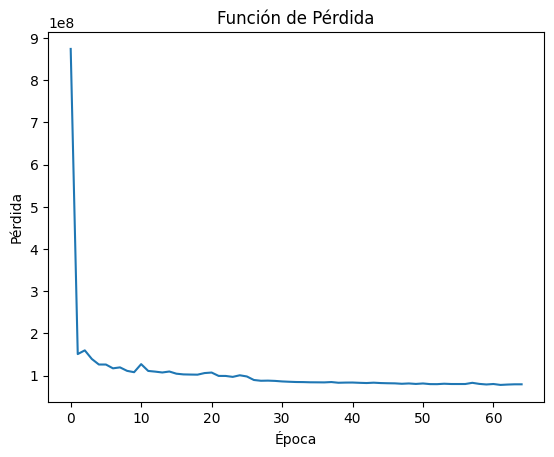

In [ ]:
# Graficar la evolución de la función de pérdida
plt.plot(history.history['loss'])
plt.title('Función de Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.show()

In [ ]:
test_data = {'color': 'BLUE', 'fueltype': 'Diésel', 'km': '34798', 'make': 'AUDI', 'model': 'A3', 'province': 'Almería', 'transmissiontype': 'AUTOMATIC', 'year': '2017', 'seller_type': 'profesional', 'bodytype': 'Berlina', 'cubiccapacity': '1598', 'doors': '5', 'hp': '116'}
test_data = dv.transform([dict(test_data)])
model.predict(test_data)

1/1 [==============================] - 0s 99ms/step


array([[1940.1656]], dtype=float32)

101/101 [==============================] - 0s 5ms/step


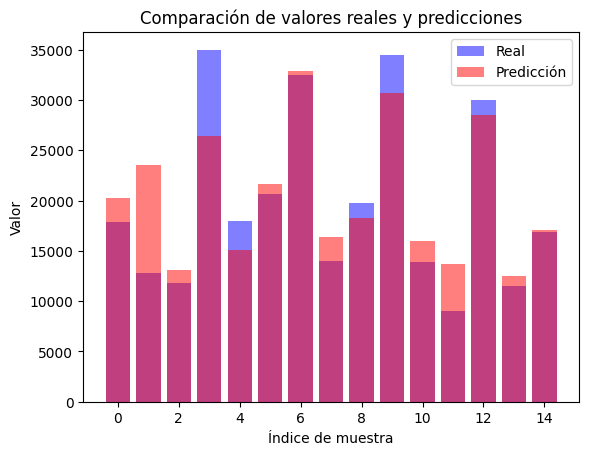

In [ ]:
y_pred = model.predict(X_test)
import numpy as np

# Crear un array de índices para los datos de prueba
indices = np.arange(15)

# Crear un gráfico de barras comparando los valores reales con las predicciones
plt.bar(indices, y_test[:15], color='b', alpha=0.5, label='Real')
plt.bar(indices, y_pred.flatten()[:15], color='r', alpha=0.5, label='Predicción')
plt.title('Comparación de valores reales y predicciones')
plt.xlabel('Índice de muestra')
plt.ylabel('Valor')
plt.legend()
plt.show()


In [ ]:
X_test[:1]

array([[0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.1990e+03, 5.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.1000e+02, 2.9252e+04,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

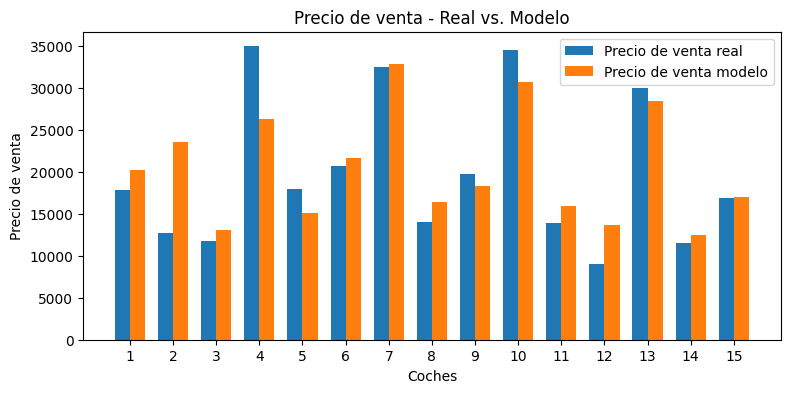

In [ ]:
ind = np.arange(15)
width = 0.35

plt.figure(figsize=(9,4))
plt.bar(ind, y_test[:15], width, label='Precio de venta real')
plt.bar(ind+width, y_pred.flatten()[:15], width, label='Precio de venta modelo')

plt.xticks(ind+width/2, np.arange(1, 16))
plt.legend(loc='best')

plt.xlabel('Coches')
plt.ylabel('Precio de venta')
plt.title('Precio de venta - Real vs. Modelo')

plt.show()
     

In [ ]:
import pickle
with open('dict_vectorizer_coches_net.pck', 'wb') as f:
  pickle.dump((dv), f)
model.save('modelo_keras_coches_net.hdf5')

In [ ]:
import tensorflow as tf
with open('dict_vectorizer_coches_net.pck', 'rb') as f:
  dv_read = pickle.load(f)
model_read = tf.keras.models.load_model('modelo_keras_coches_net.hdf5')

In [ ]:
dv_read

DictVectorizer(sparse=False)

In [ ]:
model_read

In [ ]:
from google.colab import files
import zipfile
files_to_compress = ['dict_vectorizer_coches_net.pck','modelo_keras_coches_net.hdf5']
with zipfile.ZipFile('model_with_dict_vectorizer_coches_net.zip', 'w') as zip:
  for file in files_to_compress:
    zip.write(file)

files.download('model_with_dict_vectorizer_coches_net.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>